In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#Regression model

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



from sklearn.ensemble import VotingRegressor, StackingRegressor


#metrices

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/sample_data/bangladesh_student_performance.csv")

In [ ]:
df

,date,gender,age,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,29/04/2018,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,29/04/2018,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,29/04/2018,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,29/04/2018,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,29/04/2018,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,29/04/2018,M,18,Urban,GT3,Together,2,2,Teacher,Health,No,No,108426,2,3.57,3.18
2014,29/04/2018,M,19,Urban,GT3,Together,0,3,Other,Teacher,Yes,No,100665,5,4.05,3.13
2015,29/04/2018,M,18,Urban,GT3,Together,3,2,Services,Farmer,Yes,No,92291,1,3.93,3.15
2016,29/04/2018,M,19,Rural,GT3,Together,0,2,At_home,Teacher,No,No,43926,3,3.34,2.83


# Y Data Profiling

In [ ]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.9/65.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Bangladesh Student performance prediction", explorative=True)
profile.to_file("ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 32.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
len(df.columns)

16

In [ ]:
len(df)

2018

In [ ]:
df.columns

Index(['date', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'M_Edu',
       'F_Edu', 'M_Job', 'F_Job', 'relationship', 'smoker', 'tuition_fee',
       'time_friends', 'ssc_result', 'hsc_result'],
      dtype='object')

## Modify columns name

In [ ]:
df.columns= [
    'date','st_gender','st_age','st_address',
    'st_fam_size','pstatus','m_edu','f_edu',
    'm_job','f_job','st_relationship',
    'smoker','tuition_fee','time_with_friends',
    'ssc_result','hsc_result'
]

In [ ]:
df.columns

Index(['date', 'st_gender', 'st_age', 'st_address', 'st_fam_size', 'pstatus',
       'm_edu', 'f_edu', 'm_job', 'f_job', 'st_relationship', 'smoker',
       'tuition_fee', 'time_with_friends', 'ssc_result', 'hsc_result'],
      dtype='object')

## Drop Data(date column)

In [ ]:
if 'date' in df.columns:
  df.drop(columns=['date'], inplace=True)

In [ ]:
df.columns

Index(['st_gender', 'st_age', 'st_address', 'st_fam_size', 'pstatus', 'm_edu',
       'f_edu', 'm_job', 'f_job', 'st_relationship', 'smoker', 'tuition_fee',
       'time_with_friends', 'ssc_result', 'hsc_result'],
      dtype='object')

In [ ]:
df.shape

(2018, 15)

# Separate X and y

In [ ]:
X = df.drop('hsc_result', axis=1)
y = df['hsc_result']

#Numerical Column and Categorical Columns

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
numeric_features

Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')

In [ ]:
categorical_features

Index(['st_gender', 'st_address', 'st_fam_size', 'pstatus', 'm_job', 'f_job',
       'st_relationship', 'smoker'],
      dtype='object')

# Pipeline


In [ ]:
# for numerical features

num_transformer = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

In [ ]:
# For categorical feature
cat_transformer = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [ ]:
#combine them
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transformer,numeric_features),
        ('cat',cat_transformer,categorical_features)
    ]
    )

In [ ]:
# Treain Test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)

# Ensemble - boosting, stacking

In [ ]:
# base learner
reg_lr = LinearRegression()
reg_rf = RandomForestRegressor()
reg_gb = GradientBoostingRegressor()

In [ ]:
# voting regressor
voting_reg = VotingRegressor(
    estimators= [
        ('lr', reg_lr),
        ('rf', reg_rf),
        ('gb', reg_gb)
    ]
)

In [ ]:
# Stacking
stacking_reg = StackingRegressor(
    estimators= [
        ('rf', reg_rf),
        ('gb', reg_gb)
    ],
    final_estimator= Ridge()  #the meta learner
)

# Model Training

In [ ]:
# Dictionary of all model
model_to_train = {
    'Linear Regression' : reg_lr,
    'Random Forest' : reg_rf,
    'Gradient Boosting' : reg_gb,
    'Votng Ensemble' : voting_reg,
    'Stackig Ensemble' : stacking_reg
}

In [ ]:
# Training & Evaluation
result = []

for name, model in model_to_train.items():
  #create full pipeline with preprocessor
  pipe = Pipeline(
      [
          ('preprocessor', preprocessor),
          ('model', model)
      ]
  )

  # train & predict
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)

  #Evaluate
  r2 = r2_score(y_test,y_pred)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  mae = mean_absolute_error(y_test,y_pred)

  result.append({
      "Model": name,
      "R2 Score" :r2,
      "RMSE": rmse,
      "MAE" : mae
  })

results_df = pd.DataFrame(result).sort_values("R2 Score", ascending=False)

print(results_df)

               Model  R2 Score      RMSE       MAE
4   Stackig Ensemble  0.959581  0.123082  0.098698
2  Gradient Boosting  0.959579  0.123086  0.098888
3     Votng Ensemble  0.957779  0.125796  0.100438
1      Random Forest  0.950699  0.135935  0.108233
0  Linear Regression  0.945920  0.142371  0.111376


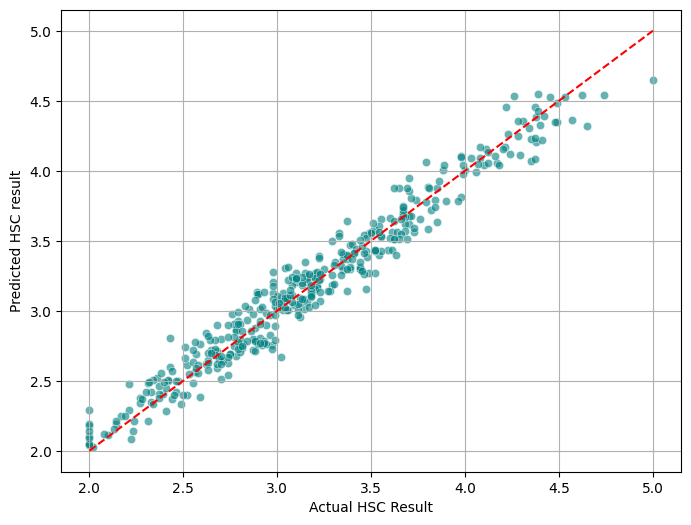

In [ ]:
best_model_name = results_df.iloc[0]['Model']
best_model_obj = model_to_train[best_model_name]

# fit the best model
final_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model_obj)
])

final_pipe.fit(X_train, y_train)
y_final_pred = final_pipe.predict(X_test)

#plot Actual vs predicted

plt.figure( figsize = (8,6) )

sns.scatterplot(x=y_test, y=y_final_pred, alpha = 0.6, color='teal' )
plt.plot( [2,5] , [2,5], color = "red", linestyle = '--'  )

plt.xlabel("Actual HSC Result")
plt.ylabel("Predicted HSC result")

plt.grid(True)
plt.show()